In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(func.max(measurement.date)).all()[0]

('2017-08-23',)

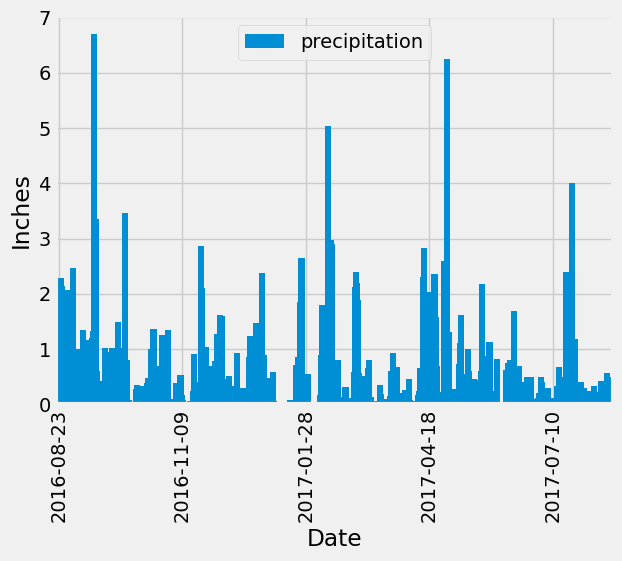

In [19]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date_query = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_prec = session.query(measurement.prcp, measurement.date).filter(measurement.date >= date_query).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names. Sort the dataframe by date.
prec_df = pd.DataFrame(year_prec, columns=['precipitation', 'date']).sort_values(by=['date'])
prec_df.set_index('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = np.arange(0, len(prec_df), 500)
x_locs = [value for value in x_axis]

prec_df.plot(kind='bar', width=25)

plt.ylabel("Inches")
plt.xlabel("Date")
plt.xticks(x_locs)

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.id)).all()

[(9,)]

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = station_count[0][0]

session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == active_station).all()

[(54.0, 85.0, 71.66378066378067)]

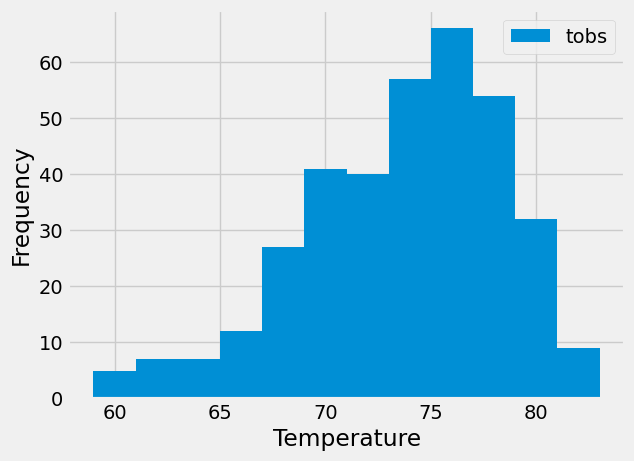

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_temp_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)

temp_data = session.query(measurement.tobs).filter(measurement.date >= query_temp_date).\
filter(measurement.station == active_station).all()

temp_df = pd.DataFrame(temp_data)

plt.hist(temp_df, bins=12)

plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])

plt.show()

# Close Session

In [16]:
# Close Session
session.close()